In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

# 1 .Load the dataset: Use pd.read_csv() to load the dataset into a pandas DataFrame.
df=pd.read_csv('league_of_legends_data_large.csv')

# 2. Split data into features and target: Separate win (target) and the remaining columns (features).
X=df.drop('win', axis=1)
y=df['win']

# 3 .Split the Data into Training and Testing Sets: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Standardize the features: Use StandardScaler() from sklearn.preprocessing to scale the features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Convert to PyTorch tensors: Use torch.tensor() to convert the data to PyTorch tensors.
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
y_test=y_test.view(-1,1)
y_train=y_train.view(-1,1)

In [5]:
## Write your code here
class logistic_regression(nn.Module):
    # Constructor
    def __init__(self, n_inputs=X_train.shape[1]):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1) #make the linear regression part first! 
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x)) #then plug that into the sigmoid function.
        return yhat

In [7]:
# Write your code here
model=logistic_regression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs=1000
def train_model(epochs):
    for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            model.eval()
            with torch.no_grad():
                test_outputs = model(X_test)
                train_outputs = model(X_train)

            accuracy_test2=1-((test_outputs>0.5).float()-y_test).abs().sum()/torch.tensor(y_test.shape[0])
            accuracy_train2=1-((train_outputs>0.5).float()-y_train).abs().sum()/torch.tensor(y_train.shape[0])

            if (epoch + 1) % (epochs // 10) == 0 or (epoch + 1) == epochs:
                print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
                # print(f"Accuracy_train: {accuracy_train1}")
                # print(f"Accuracy_test: {accuracy_test1}")
                print(f"Accuracy_train: {accuracy_train2}")
                print(f"Accuracy_test: {accuracy_test2}")
    return test_outputs 
test_outputs=train_model(epochs)

Epoch [100/1000], Loss: 0.7053
Accuracy_train: 0.5299999713897705
Accuracy_test: 0.5649999976158142
Epoch [200/1000], Loss: 0.6993
Accuracy_train: 0.5349999666213989
Accuracy_test: 0.5550000071525574
Epoch [300/1000], Loss: 0.6957
Accuracy_train: 0.5375000238418579
Accuracy_test: 0.5649999976158142
Epoch [400/1000], Loss: 0.6935
Accuracy_train: 0.5387499928474426
Accuracy_test: 0.5699999928474426
Epoch [500/1000], Loss: 0.6922
Accuracy_train: 0.5349999666213989
Accuracy_test: 0.574999988079071
Epoch [600/1000], Loss: 0.6914
Accuracy_train: 0.5337499976158142
Accuracy_test: 0.5800000429153442
Epoch [700/1000], Loss: 0.6910
Accuracy_train: 0.5287500023841858
Accuracy_test: 0.5800000429153442
Epoch [800/1000], Loss: 0.6907
Accuracy_train: 0.5225000381469727
Accuracy_test: 0.5649999976158142
Epoch [900/1000], Loss: 0.6905
Accuracy_train: 0.5287500023841858
Accuracy_test: 0.5649999976158142
Epoch [1000/1000], Loss: 0.6904
Accuracy_train: 0.5237500071525574
Accuracy_test: 0.5649999976158142


In [9]:
## Write your code here
#resetting the loss and model
model=logistic_regression()
criterion = nn.BCELoss()
#initialize optimizer with L2 reg (weight_decay=0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

#Using the same training model established in task 3. The model auto outputs the training and test accuracy
test_outputs=train_model(epochs)

Epoch [100/1000], Loss: 0.7160
Accuracy_train: 0.5225000381469727
Accuracy_test: 0.5
Epoch [200/1000], Loss: 0.7061
Accuracy_train: 0.5337499976158142
Accuracy_test: 0.5149999856948853
Epoch [300/1000], Loss: 0.6999
Accuracy_train: 0.5337499976158142
Accuracy_test: 0.5349999666213989
Epoch [400/1000], Loss: 0.6962
Accuracy_train: 0.5362499952316284
Accuracy_test: 0.5149999856948853
Epoch [500/1000], Loss: 0.6939
Accuracy_train: 0.5412499904632568
Accuracy_test: 0.5249999761581421
Epoch [600/1000], Loss: 0.6925
Accuracy_train: 0.5387499928474426
Accuracy_test: 0.5299999713897705
Epoch [700/1000], Loss: 0.6916
Accuracy_train: 0.5449999570846558
Accuracy_test: 0.5199999809265137
Epoch [800/1000], Loss: 0.6911
Accuracy_train: 0.5387499928474426
Accuracy_test: 0.5399999618530273
Epoch [900/1000], Loss: 0.6908
Accuracy_train: 0.5287500023841858
Accuracy_test: 0.550000011920929
Epoch [1000/1000], Loss: 0.6906
Accuracy_train: 0.5325000286102295
Accuracy_test: 0.5550000071525574


              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54        98
         1.0       0.56      0.58      0.57       102

    accuracy                           0.56       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.56      0.55       200



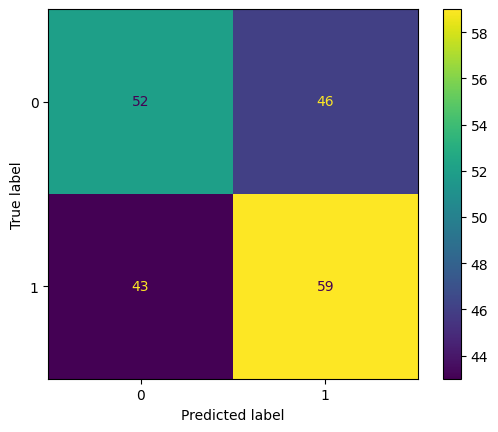

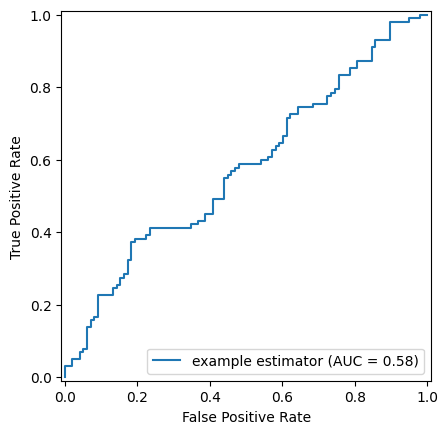

In [11]:
#Using the previously saved values 
y_pred=test_outputs>0.5
y_true=y_test

#Confusion Matirx, displaying true/false positives/negatives
cm = confusion_matrix(y_true, y_pred)
disp=ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()
#ROC curve and area under curve. 
y_score=test_outputs #the score is the value BEFORE thresholding. could also just use the test_outputs.
fpr, tpr, thresholds =roc_curve(y_true,y_score)
AreaUnderCurve=auc(fpr, tpr)
rock_curve=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AreaUnderCurve, estimator_name='example estimator')
rock_curve.plot()
#Classification report. 
print(classification_report(y_true,y_pred))

In [13]:
# Save the model
torch.save(model.state_dict(), 'LeagueModel.pth')

# Load the model
model=logistic_regression()
model.load_state_dict(torch.load('LeagueModel.pth'))


# Ensure the loaded model is in evaluation mode
model.eval()


# Evaluate the loaded model
with torch.no_grad():
    test_outputs = model(X_test)
accuracy_test2=1-((test_outputs>0.5).float()-y_test).abs().sum()/torch.tensor(y_test.shape[0])


In [15]:
#Rate 0.01
model=logistic_regression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
test_outputs=train_model(epochs)
accuracy_test0_01=1-((test_outputs>0.5).float()-y_test).abs().sum()/torch.tensor(y_test.shape[0])

#Rate 0.05
model=logistic_regression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)
test_outputs=train_model(epochs)
accuracy_test0_05=1-((test_outputs>0.5).float()-y_test).abs().sum()/torch.tensor(y_test.shape[0])

#Rate 0.1
model=logistic_regression()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
test_outputs=train_model(epochs)
accuracy_test0_1=1-((test_outputs>0.5).float()-y_test).abs().sum()/torch.tensor(y_test.shape[0])

#results
print('0.01 learning rate has an accuracy of:', accuracy_test0_01.item())
print('0.05 learning rate has an accuracy of:', accuracy_test0_05.item())
print('0.1 learning rate has an accuracy of:', accuracy_test0_1.item())
print('the best learning rate seems to be 0.05')

Epoch [100/1000], Loss: 0.7281
Accuracy_train: 0.4950000047683716
Accuracy_test: 0.4100000262260437
Epoch [200/1000], Loss: 0.7134
Accuracy_train: 0.48874998092651367
Accuracy_test: 0.4150000214576721
Epoch [300/1000], Loss: 0.7044
Accuracy_train: 0.5012500286102295
Accuracy_test: 0.4350000023841858
Epoch [400/1000], Loss: 0.6988
Accuracy_train: 0.5024999976158142
Accuracy_test: 0.44999998807907104
Epoch [500/1000], Loss: 0.6954
Accuracy_train: 0.5074999928474426
Accuracy_test: 0.49000000953674316
Epoch [600/1000], Loss: 0.6934
Accuracy_train: 0.5099999904632568
Accuracy_test: 0.5049999952316284
Epoch [700/1000], Loss: 0.6922
Accuracy_train: 0.5287500023841858
Accuracy_test: 0.5249999761581421
Epoch [800/1000], Loss: 0.6914
Accuracy_train: 0.5237500071525574
Accuracy_test: 0.5449999570846558
Epoch [900/1000], Loss: 0.6910
Accuracy_train: 0.5275000333786011
Accuracy_test: 0.550000011920929
Epoch [1000/1000], Loss: 0.6907
Accuracy_train: 0.5325000286102295
Accuracy_test: 0.56000000238418

,Label,Value
7,damage_dealt,-0.082235
1,deaths,-0.014273
4,cs,-0.009868
6,wards_killed,-0.003879
2,assists,0.001318
0,kills,0.056234
3,gold_earned,0.063432
5,wards_placed,0.081847


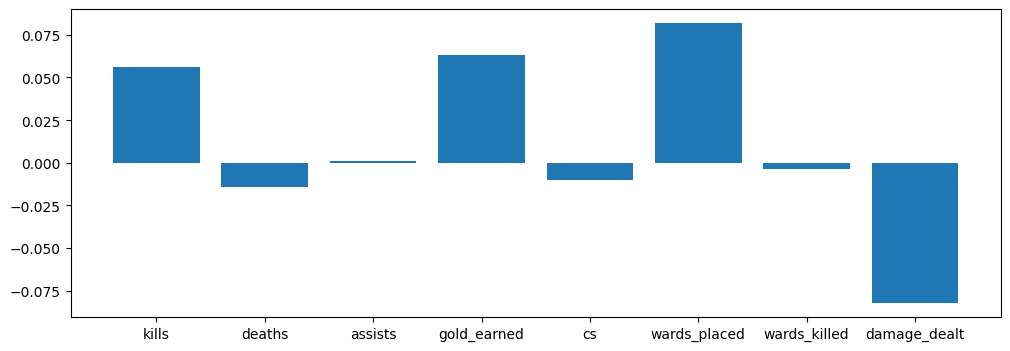

In [17]:
# Extract and flatten the weights of the linear layer
weights=model.linear.weight.data.numpy().flatten()

# Create the dataframe
weights_df = pd.DataFrame({'Label': X.columns, 'Value': weights})

#Sort and Plot Feature Importance. 
weights_df=weights_df.sort_values(by=['Value'])
plt.figure(figsize=[12,4])
plt.bar(X.columns, weights)

weights_df

#Damage dealt appears to have the greatest impact on the prediction, however, it is also inversely related to the win/loss prediction. #This seems counterintuitive, but may lead 